In [1]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Esperanza_vida.csv", usecols=[1,2])
df.head()

,year,value
0,1960-01-01,69.123902
1,1961-01-01,69.760244
2,1962-01-01,69.149756
3,1963-01-01,69.248049
4,1964-01-01,70.311707


In [3]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1960-01-01,69.123902,1
1,1961-01-01,69.760244,1
2,1962-01-01,69.149756,1
3,1963-01-01,69.248049,1
4,1964-01-01,70.311707,1


In [4]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [5]:
df["ds"] = pd.to_datetime(df["ds"])

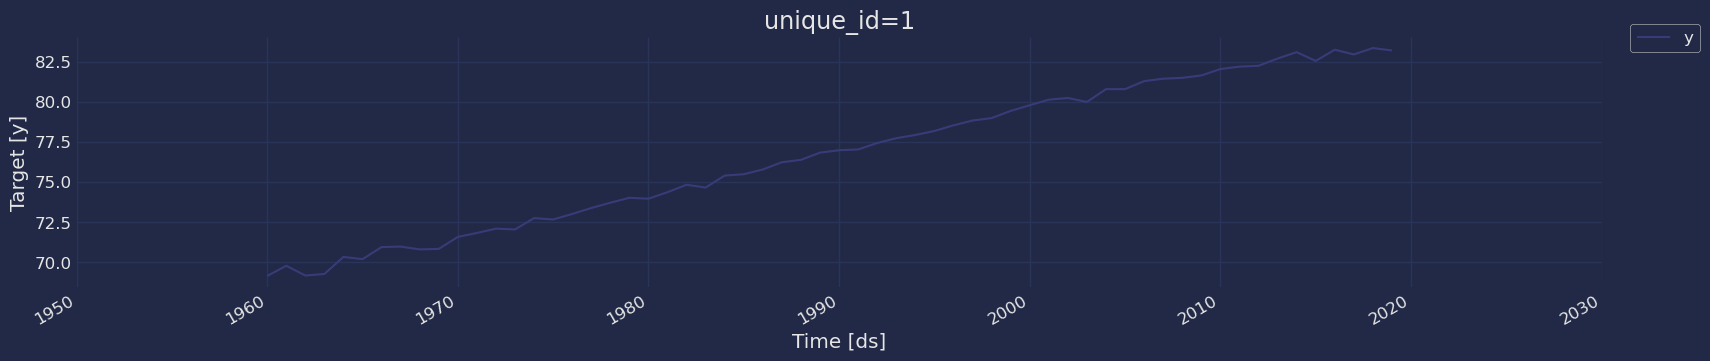

In [6]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

count    60.000000
mean     76.632439
std       4.495279
min      69.123902
25%      72.712622
50%      76.895122
75%      80.781098
max      83.346341
Name: y, dtype: float64

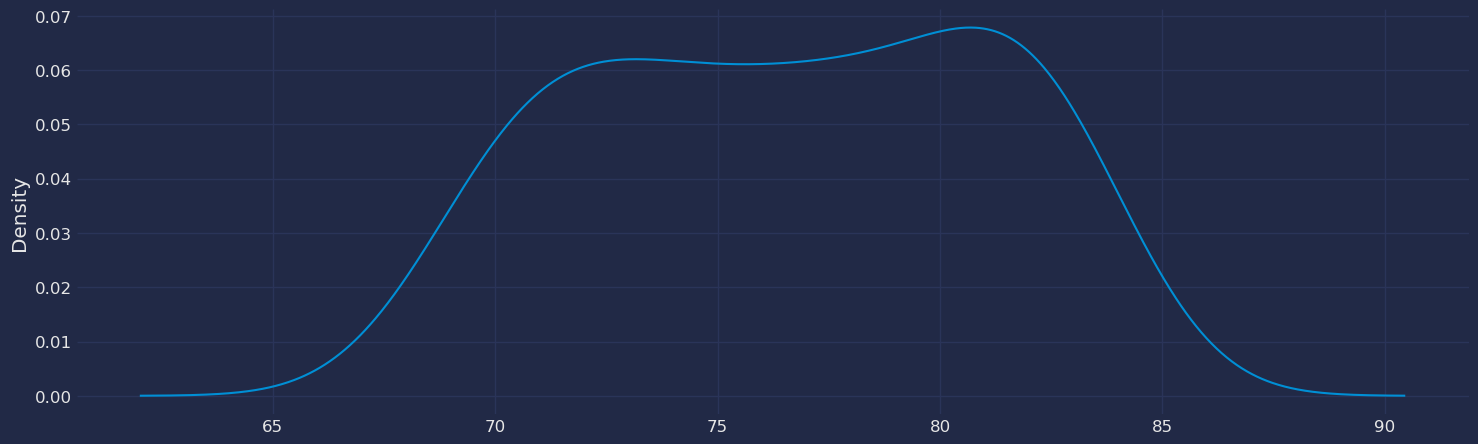

In [7]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

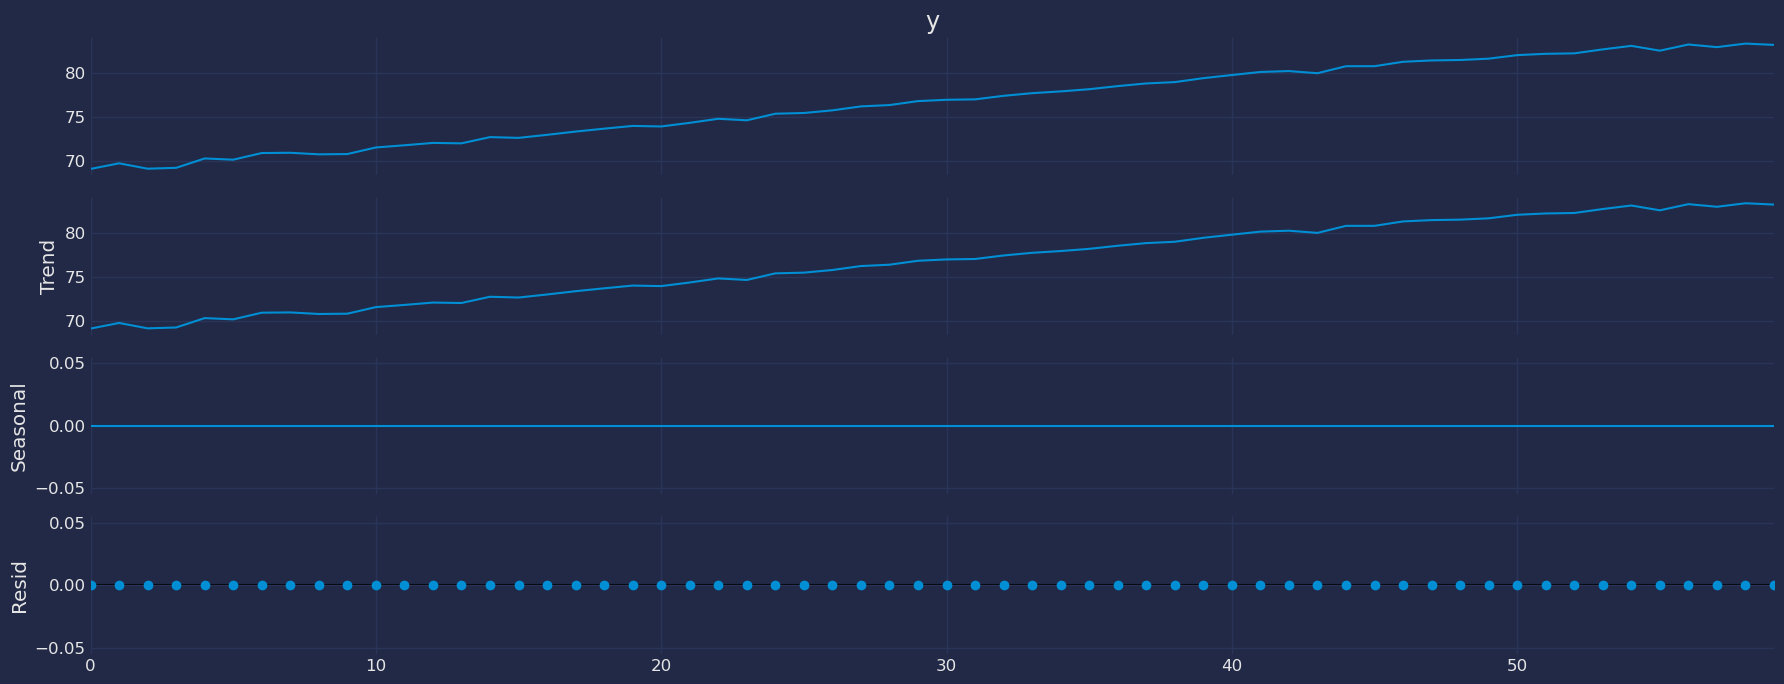

In [9]:
decomposed=seasonal_decompose(df["y"], model = "add", period=1)
decomposed.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [12]:
Augmented_Dickey_Fuller_Test_func(df["y"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                 -1.578590
p-value                         0.494339
No Lags Used                    2.000000
Number of observations used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [13]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()

,ds,y,unique_id,y_diff
1,1961-01-01,69.760244,1,0.636341
2,1962-01-01,69.149756,1,-0.610488
3,1963-01-01,69.248049,1,0.098293
4,1964-01-01,70.311707,1,1.063659
5,1965-01-01,70.171707,1,-0.140000


In [14]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                -8.510100e+00
p-value                        1.173776e-13
No Lags Used                   1.000000e+00
Number of observations used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


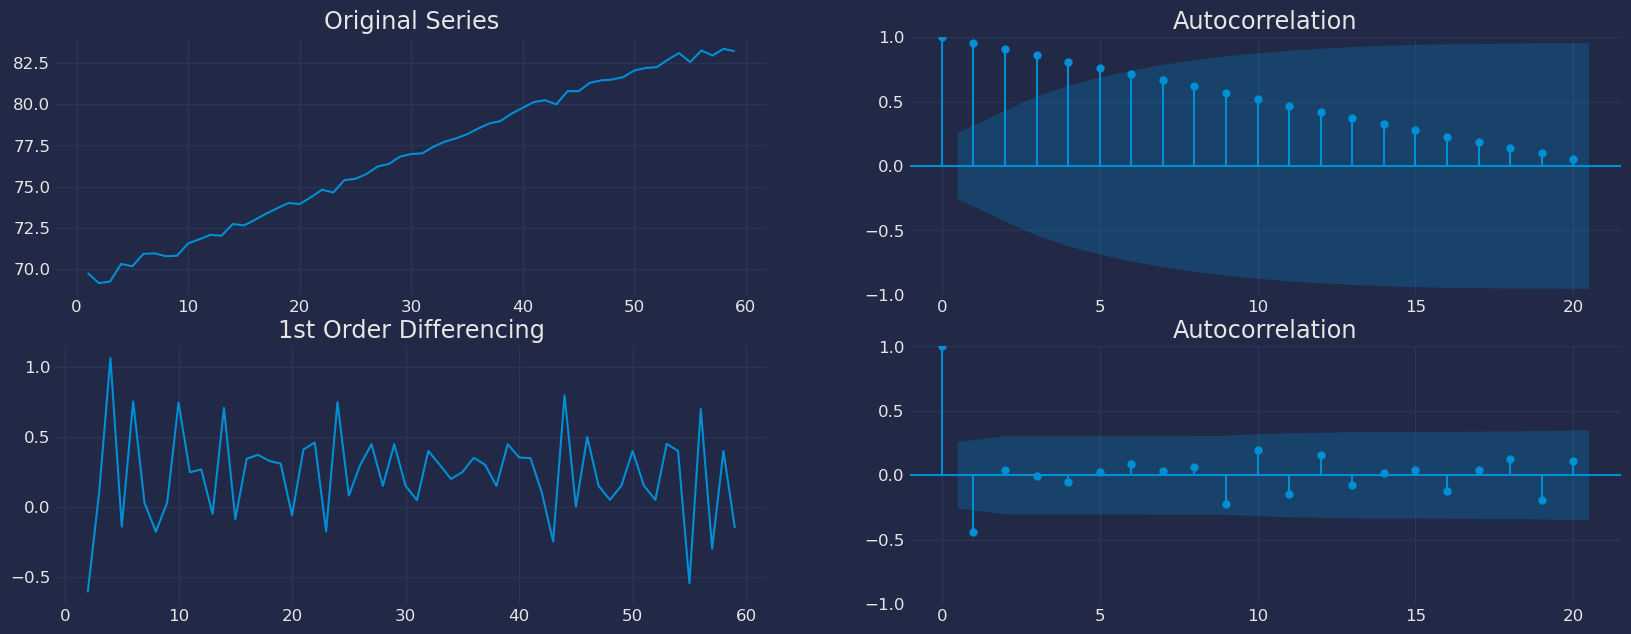

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()

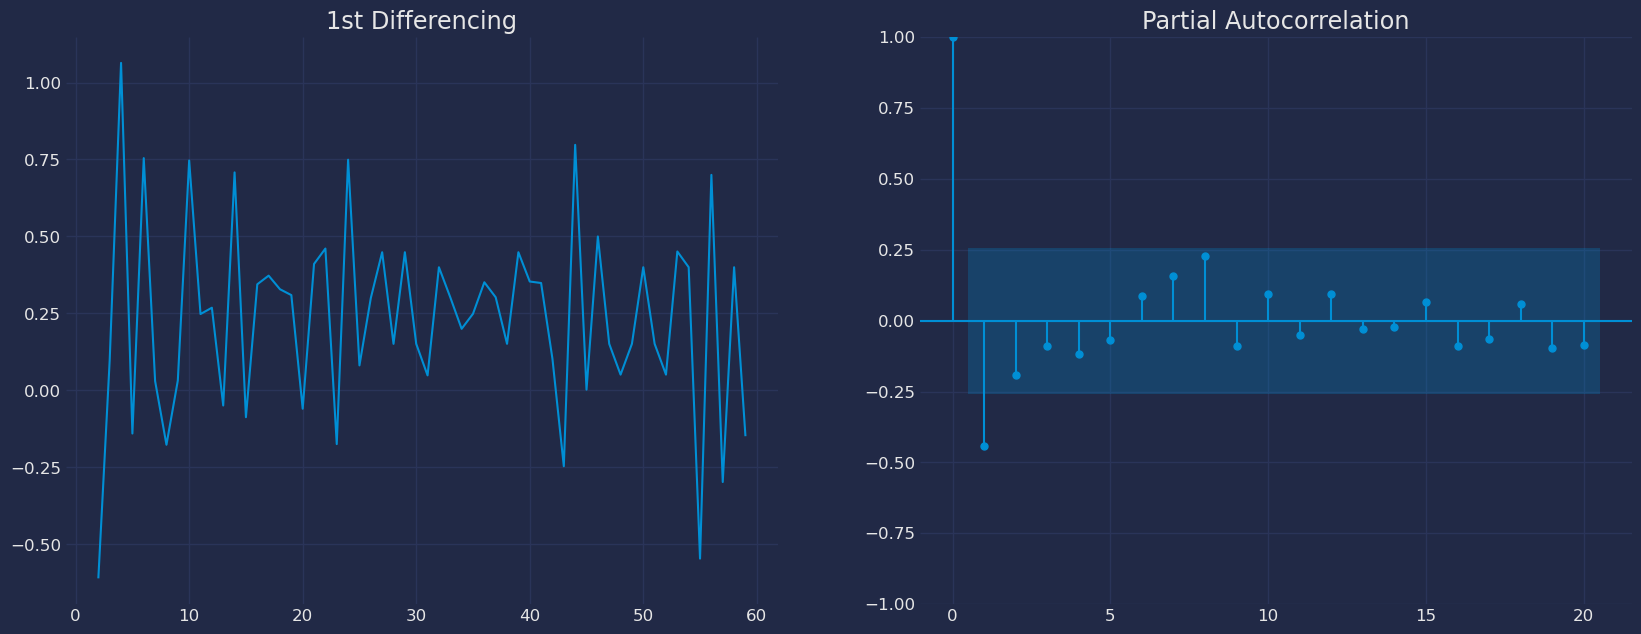

In [16]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()

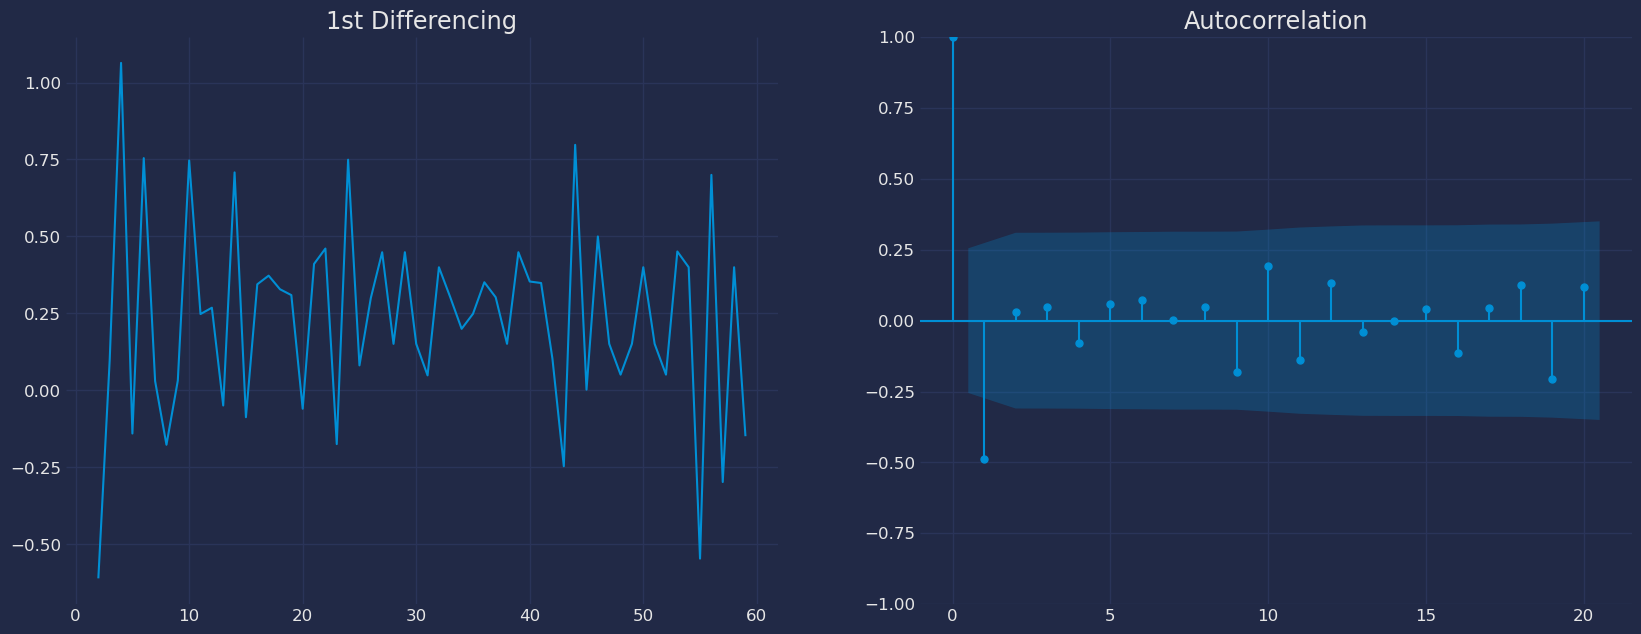

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()

In [18]:
from statsforecast.models import ARIMA

In [19]:
arima = ARIMA(order=(1, 1, 1), season_length=1)

In [20]:
arima = arima.fit(y=df["y"].values)

In [21]:
y_hat_dict = arima.predict(h=6,)
y_hat_dict

{'mean': array([83.201553  , 83.20016307, 83.20064701, 83.20047852, 83.20053718,
        83.20051676])}

In [22]:
y_hat_dict2 = arima.predict(h=6,level=[95])
y_hat_dict2

{'mean': array([83.201553  , 83.20016307, 83.20064701, 83.20047852, 83.20053718,
        83.20051676]),
 'lo-95': 0    82.406611
 1    82.082299
 2    81.832346
 3    81.621506
 4    81.435698
 5    81.267655
 Name: 95%, dtype: float64,
 'hi-95': 0    83.996495
 1    84.318027
 2    84.568948
 3    84.779451
 4    84.965376
 5    85.133378
 Name: 95%, dtype: float64}

In [23]:
Y_hat_df=arima.forecast(y=df["y"].values, h=6, fitted=True)
Y_hat_df

{'mean': array([83.201553  , 83.20016307, 83.20064701, 83.20047852, 83.20053718,
        83.20051676]),
 'fitted': array([69.05477857, 69.12394817, 69.75299438, 69.15912018, 69.24378043,
        70.3010876 , 70.17687149, 70.91580643, 70.95970624, 70.7809505 ,
        70.81126886, 71.55054442, 71.80679168, 72.07233443, 72.0279183 ,
        72.72583279, 72.65118662, 72.98674109, 73.36216447, 73.69027839,
        74.00014861, 73.94469901, 74.34873167, 74.8111531 , 74.64339332,
        75.37995778, 75.47302934, 75.76655703, 76.21583111, 76.37025745,
        76.81458465, 76.97067731, 77.01897755, 77.41515796, 77.71998951,
        77.92034484, 78.16845267, 78.51873753, 78.82204435, 78.97468575,
        79.41961419, 79.77564854, 80.12368406, 80.2291665 , 79.9857536 ,
        80.77049463, 80.78626529, 81.27613439, 81.43472012, 81.48459197,
        81.63513185, 82.03254065, 82.18745311, 82.23856227, 82.68528462,
        83.08738007, 82.55106032, 83.2335563 , 82.95319956, 83.33949705])}

In [24]:
forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast

C:\Users\pacol\AppData\Local\Temp\ipykernel_10932\2483411741.py:1: FutureWarning: 'ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))


,ds
0,2014-01-01
1,2015-01-01
2,2016-01-01
3,2017-01-01
4,2018-01-01
5,2019-01-01


In [25]:
df=df.set_index("ds")

In [26]:
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast

,unique_id,hat,lo-95,hi-95
ds,,,,
2014-01-01,1,83.201553,82.406611,83.996495
2015-01-01,1,83.200163,82.082299,84.318027
2016-01-01,1,83.200647,81.832346,84.568948
2017-01-01,1,83.200479,81.621506,84.779451
2018-01-01,1,83.200537,81.435698,84.965376
2019-01-01,1,83.200517,81.267655,85.133378


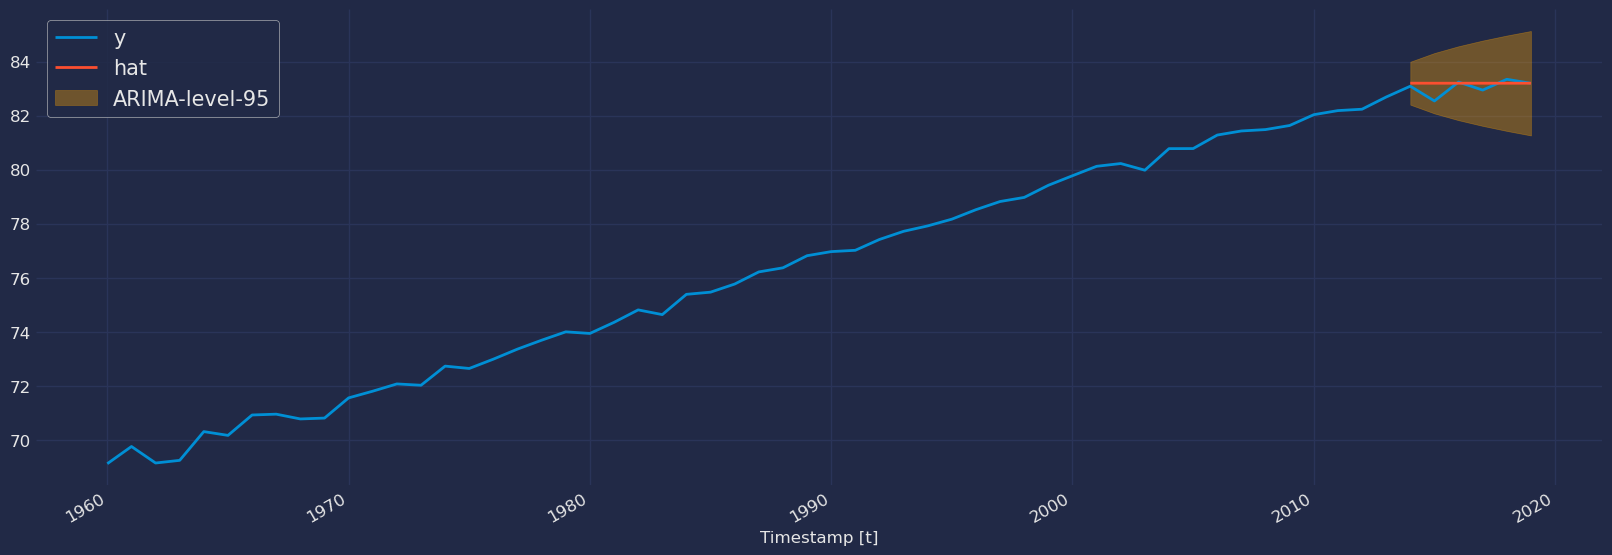

In [27]:
_, ax = plt.subplots(1, 1)
df_plot = pd.concat([df, forecast])
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.35,
                color='orange',
                label='ARIMA-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)

In [28]:
df.reset_index("ds", inplace=True)
Y_train_df = df[df.ds<='2013-01-01'] 
Y_test_df = df[df.ds>'2013-01-01'] 

Y_train_df.shape, Y_test_df.shape

((54, 3), (6, 3))

In [29]:
from sklearn import metrics

def model_evaluation(y_true, y_pred, Model):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {Model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')

In [30]:
model_evaluation(Y_test_df["y"], forecast["hat"], "Arima")

Model Evaluation: Arima
MSE is : 0.08846533858238875
MAE is : 0.20228704533860528
RMSE is : 0.2974312333672924
MAPE is : 0.2443076952412365
R2 is : -0.2792859005909736
corr is : 0.3634615509000946



# Netflix Stock Price

In [31]:
import yfinance as yf

stock = "NFLX"
ticker = yf.Ticker(stock)
data = ticker.history(start="2013-01-01", end="2023-12-31", interval="1mo")["Close"]

In [32]:
df = pd.DataFrame(data).reset_index()
df.head()

,Date,Close
0,2013-01-01 00:00:00-05:00,23.605715
1,2013-02-01 00:00:00-05:00,26.868570
2,2013-03-01 00:00:00-05:00,27.040001
3,2013-04-01 00:00:00-04:00,30.867144
4,2013-05-01 00:00:00-04:00,32.321430


In [33]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2013-01-01 00:00:00-05:00,23.605715,1
1,2013-02-01 00:00:00-05:00,26.868570,1
2,2013-03-01 00:00:00-05:00,27.040001,1
3,2013-04-01 00:00:00-04:00,30.867144,1
4,2013-05-01 00:00:00-04:00,32.321430,1


In [34]:
print(df.dtypes)

ds           datetime64[ns, America/New_York]
y                                     float64
unique_id                              object
dtype: object


In [35]:
df["ds"] = pd.to_datetime(df["ds"])

In [36]:
df['ds'] = df['ds'].dt.tz_localize(None)

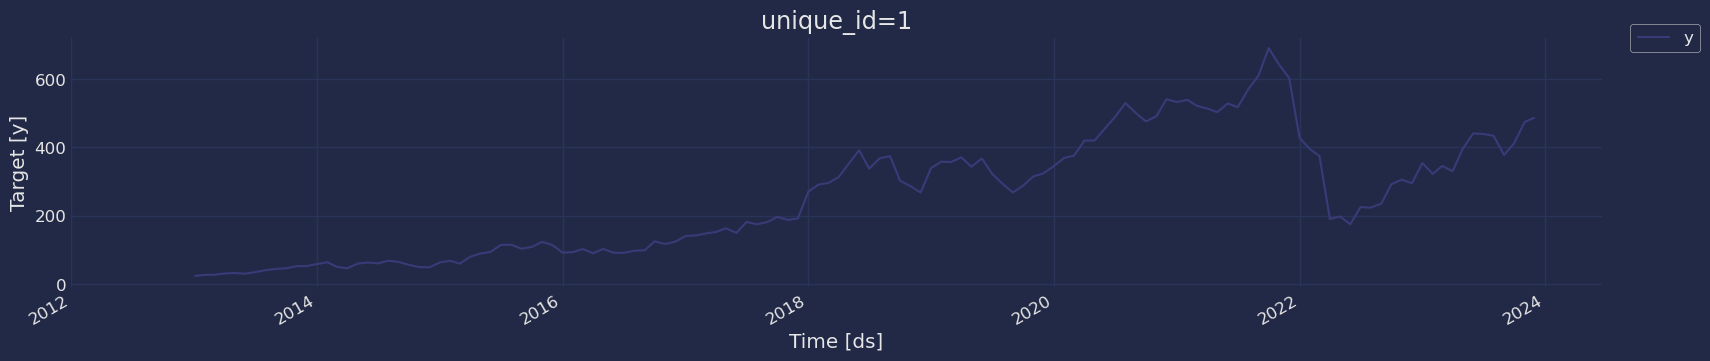

In [37]:
StatsForecast.plot(df)

count    132.000000
mean     254.635379
std      173.662821
min       23.605715
25%       93.017502
50%      251.529999
75%      374.817497
max      690.309998
Name: y, dtype: float64

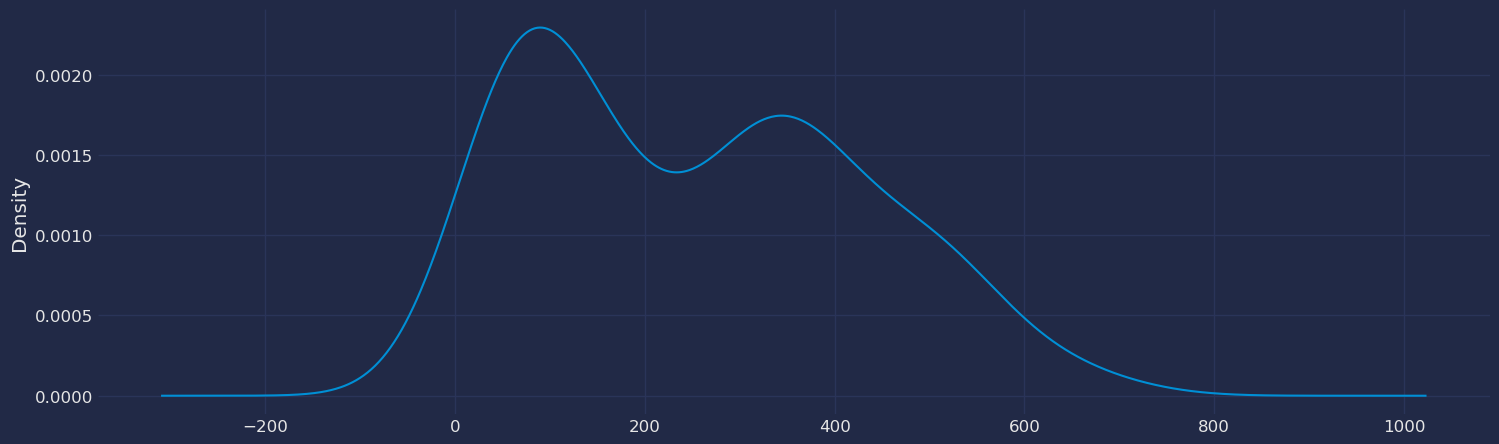

In [38]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()

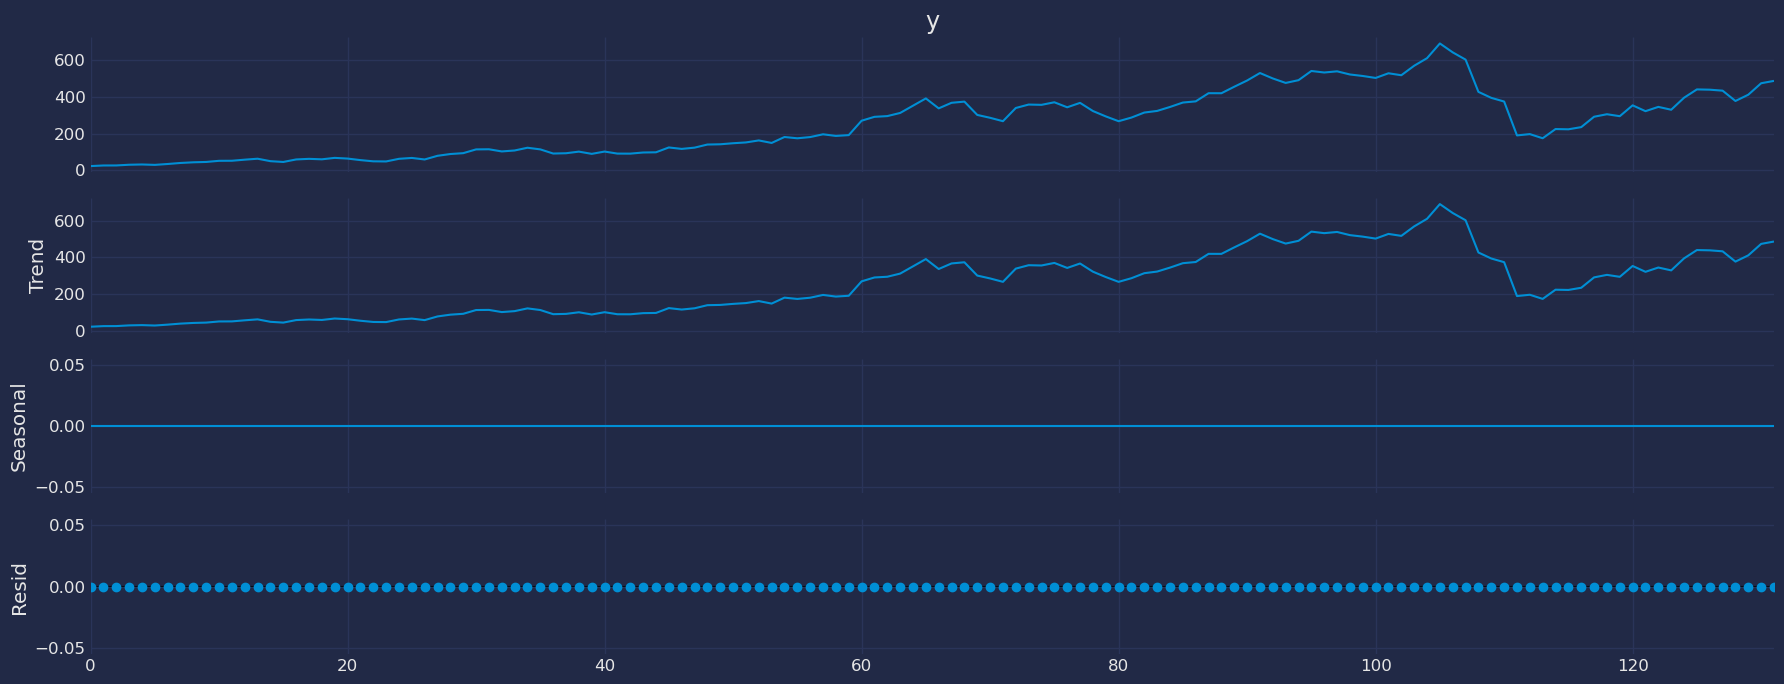

In [39]:
decomposed=seasonal_decompose(df["y"], model = "add", period=1)
decomposed.plot()
plt.show()

In [40]:
Augmented_Dickey_Fuller_Test_func(df["y"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                  -1.183494
p-value                          0.680656
No Lags Used                     6.000000
Number of observations used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [41]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()

,ds,y,unique_id,y_diff
1,2013-02-01,26.868570,1,3.262856
2,2013-03-01,27.040001,1,0.171431
3,2013-04-01,30.867144,1,3.827143
4,2013-05-01,32.321430,1,1.454287
5,2013-06-01,30.155714,1,-2.165716


In [42]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Life expectancy")

Dickey-Fuller test results for columns: Life expectancy
Test Statistic                  -5.335277
p-value                          0.000005
No Lags Used                     5.000000
Number of observations used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


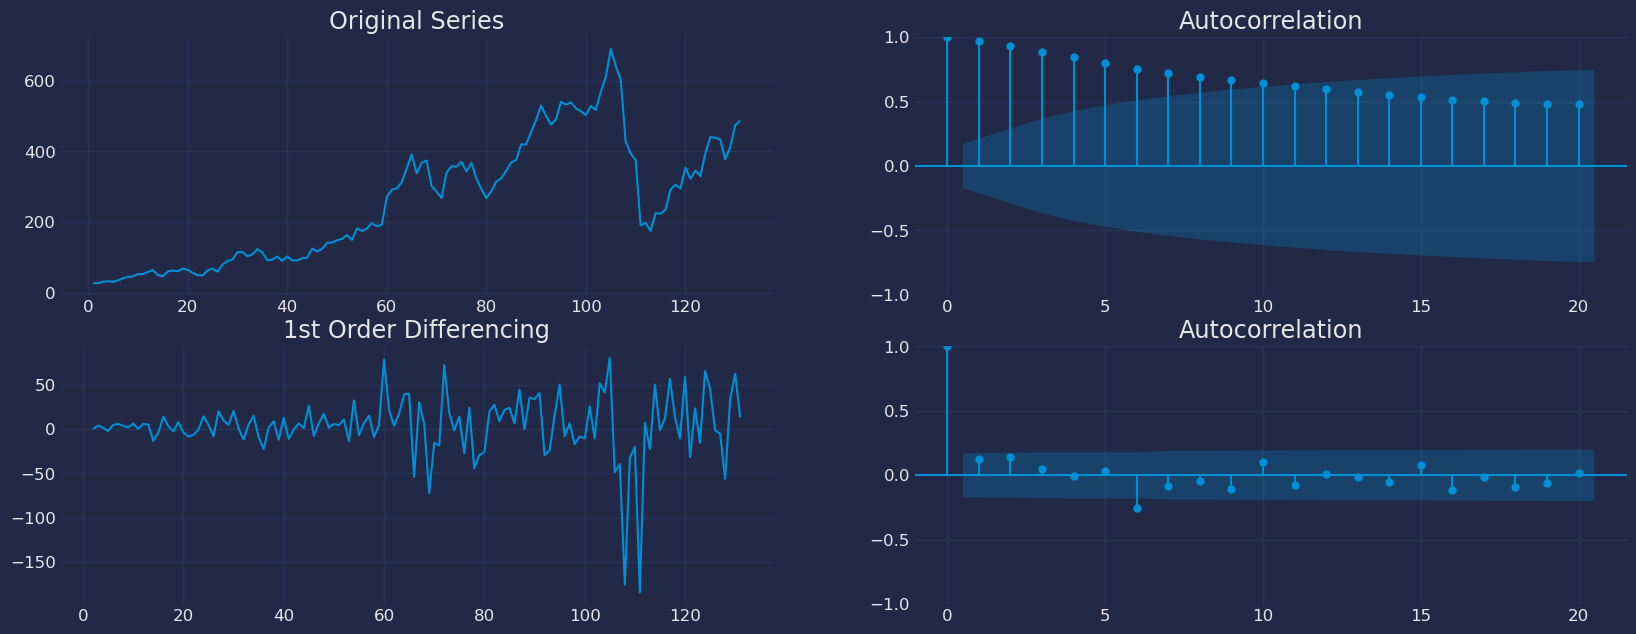

In [43]:
fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()

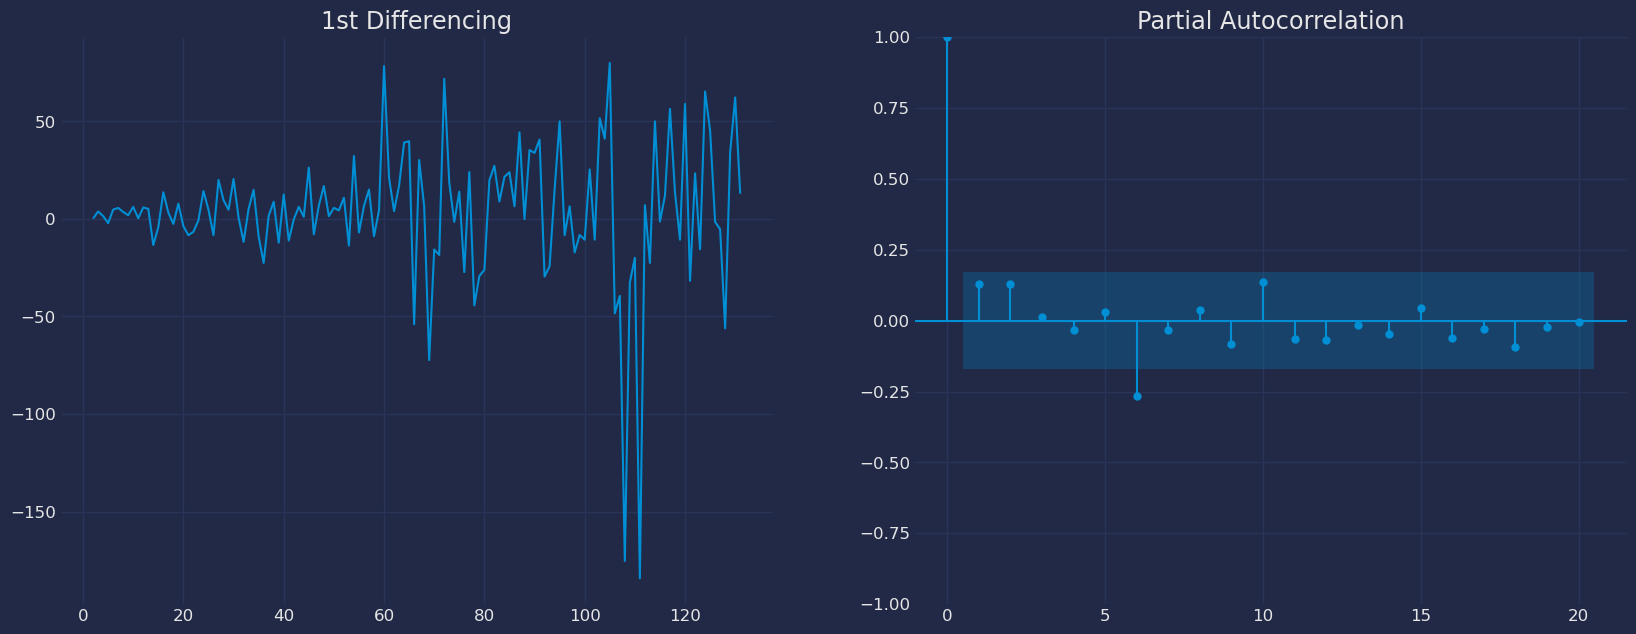

In [44]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()

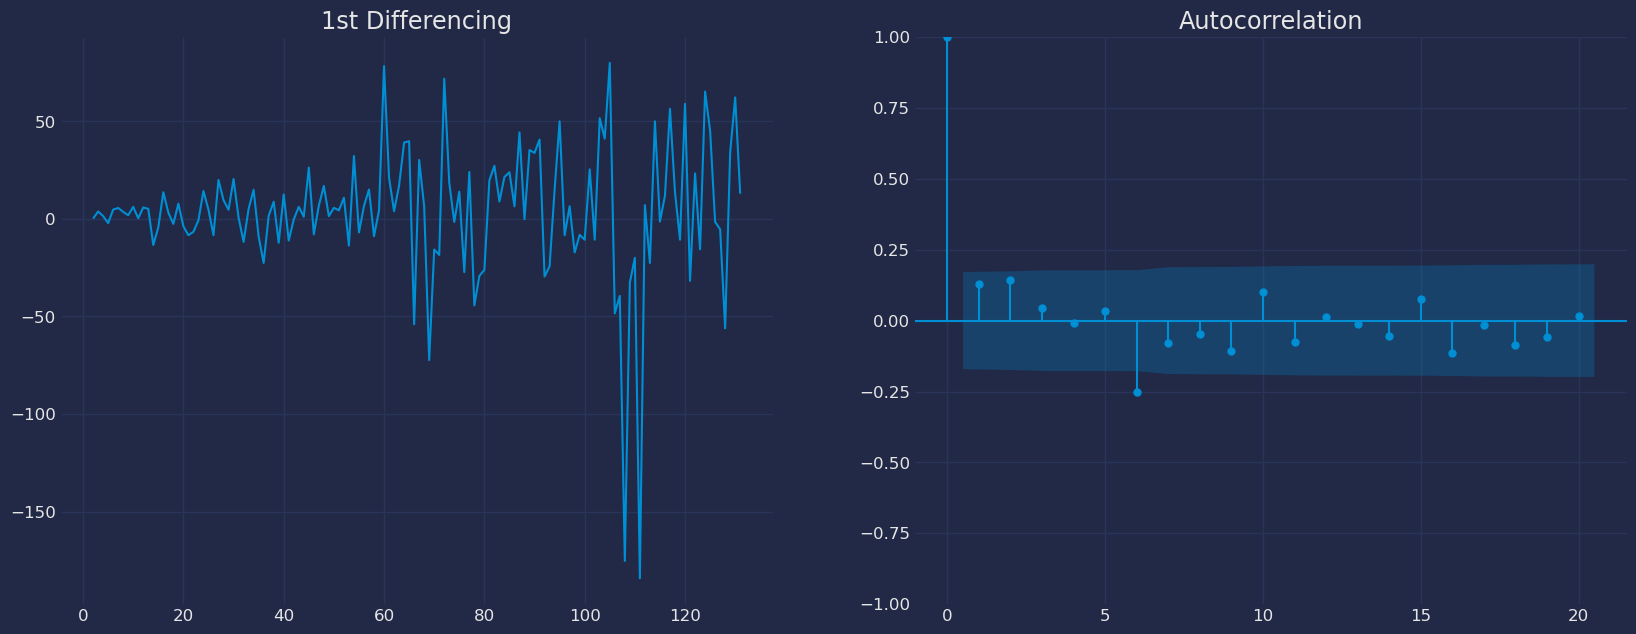

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()

In [46]:
arima = ARIMA(order=(1, 1, 1), season_length=1)

In [47]:
arima = arima.fit(y=df["y"].values)

In [48]:
y_hat_dict = arima.predict(h=12,)
y_hat_dict

{'mean': array([492.95871922, 496.46996687, 498.4981688 , 499.66971904,
        500.34644159, 500.73733682, 500.96312963, 501.09355433,
        501.16889154, 501.21240858, 501.23754532, 501.25206506])}

In [49]:
y_hat_dict2 = arima.predict(h=12,level=[95])
y_hat_dict2

{'mean': array([492.95871922, 496.46996687, 498.4981688 , 499.66971904,
        500.34644159, 500.73733682, 500.96312963, 501.09355433,
        501.16889154, 501.21240858, 501.23754532, 501.25206506]),
 'lo-95': 0     425.432844
 1     393.825238
 2     366.522847
 3     342.027499
 4     319.755104
 5     299.321283
 6     280.426953
 7     262.830307
 8     246.334756
 9     230.780482
 10    216.037447
 11    201.999506
 Name: 95%, dtype: float64,
 'hi-95': 0     560.484594
 1     599.114696
 2     630.473490
 3     657.311939
 4     680.937779
 5     702.153391
 6     721.499306
 7     739.356801
 8     756.003028
 9     771.644335
 10    786.437644
 11    800.504625
 Name: 95%, dtype: float64}

In [50]:
Y_hat_df=arima.forecast(y=df["y"].values, h=12, fitted=True)
Y_hat_df

{'mean': array([492.95871922, 496.46996687, 498.4981688 , 499.66971904,
        500.34644159, 500.73733682, 500.96312963, 501.09355433,
        501.16889154, 501.21240858, 501.23754532, 501.25206506]),
 'fitted': array([ 23.5821091 ,  23.65589468,  27.38326017,  27.28906736,
         31.5301387 ,  32.81898575,  30.05738236,  35.57401976,
         41.65498276,  45.17084748,  46.77505929,  53.45921848,
         53.16500646,  59.57372274,  64.88770798,  48.88410293,
         44.77673935,  61.14004093,  64.04155121,  60.49413949,
         69.41629186,  64.41838476,  54.88593384,  48.0275977 ,
         48.05557687,  64.86445843,  69.28681469,  58.94686577,
         82.14159162,  91.69254785,  95.62866252, 118.04390899,
        116.7503037 , 102.29985822, 108.70599536, 125.63634985,
        114.08191939,  88.44644861,  92.16867634, 102.97018972,
         88.58338328, 103.7601177 ,  90.38888287,  90.74445445,
         98.1291639 ,  99.00326173, 128.87818157, 117.59488915,
        125.0423354 

In [51]:
forecast=pd.Series(pd.date_range("2023-01-01", freq="M", periods=12))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast

C:\Users\pacol\AppData\Local\Temp\ipykernel_10932\2840709346.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast=pd.Series(pd.date_range("2023-01-01", freq="M", periods=12))


,ds
0,2023-01-31
1,2023-02-28
2,2023-03-31
3,2023-04-30
4,2023-05-31
5,2023-06-30
6,2023-07-31
7,2023-08-31
8,2023-09-30
9,2023-10-31


In [52]:
df=df.set_index("ds")

In [53]:
forecast["unique_id"]="1"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast

,unique_id,hat,lo-95,hi-95
ds,,,,
2023-01-31,1,492.958719,425.432844,560.484594
2023-02-28,1,496.469967,393.825238,599.114696
2023-03-31,1,498.498169,366.522847,630.473490
2023-04-30,1,499.669719,342.027499,657.311939
2023-05-31,1,500.346442,319.755104,680.937779
2023-06-30,1,500.737337,299.321283,702.153391
2023-07-31,1,500.963130,280.426953,721.499306
2023-08-31,1,501.093554,262.830307,739.356801
2023-09-30,1,501.168892,246.334756,756.003028


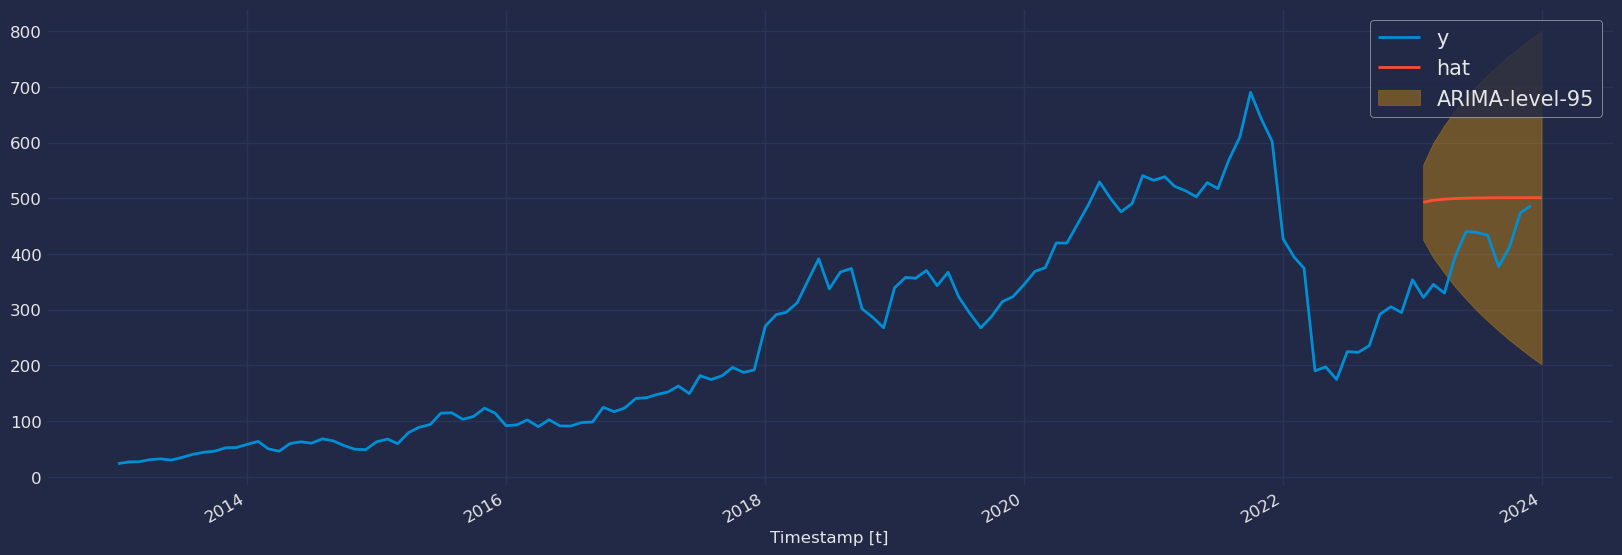

In [54]:
_, ax = plt.subplots(1, 1)
df_plot = pd.concat([df, forecast])
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.35,
                color='orange',
                label='ARIMA-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)